In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Removendo duplicatas
df_clean = df.drop_duplicates()
df_clean.shape


(1359, 12)

In [7]:
# Contém nulos ?
df_clean.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Criando novas colunas
df_clean['quality_str'] =  df_clean['quality'].astype('str')

C:\Users\corpc34475\AppData\Local\Temp\ipykernel_19940\2470292644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['quality_str'] =  df_clean['quality'].astype('str')


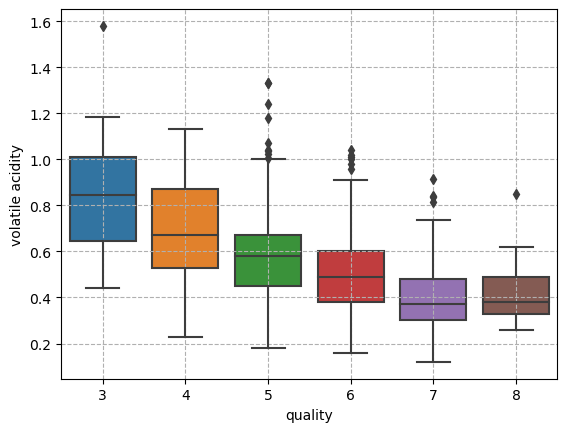

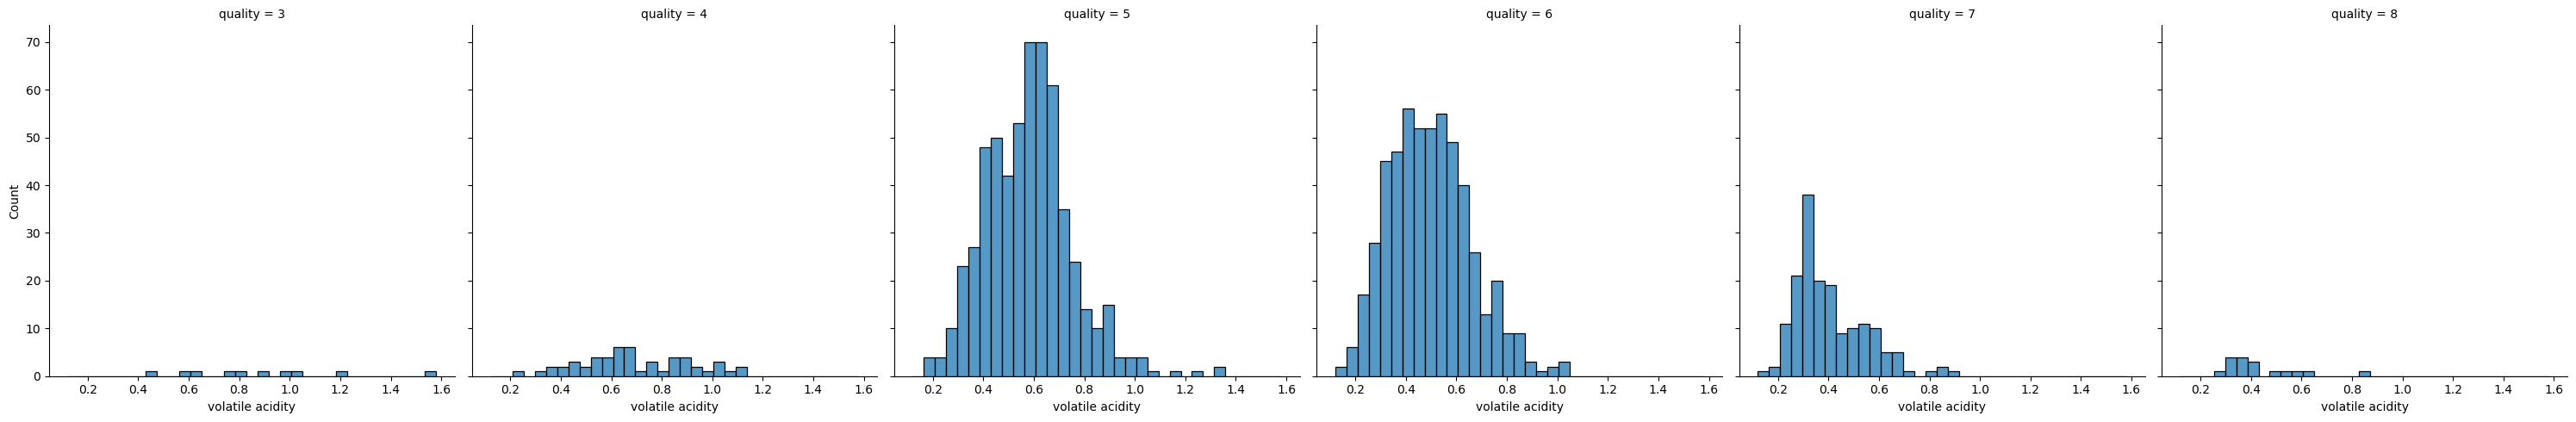

In [9]:
# Distribuição da "volatile acidity" por "quality"
ax = sns.boxplot(data=df_clean, x='quality', y='volatile acidity')
ax.grid(True, ls='--')

ax2 = sns.displot(data=df_clean, x='volatile acidity', col='quality')


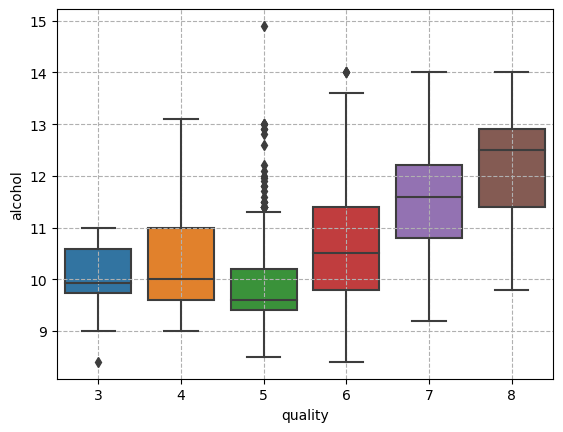

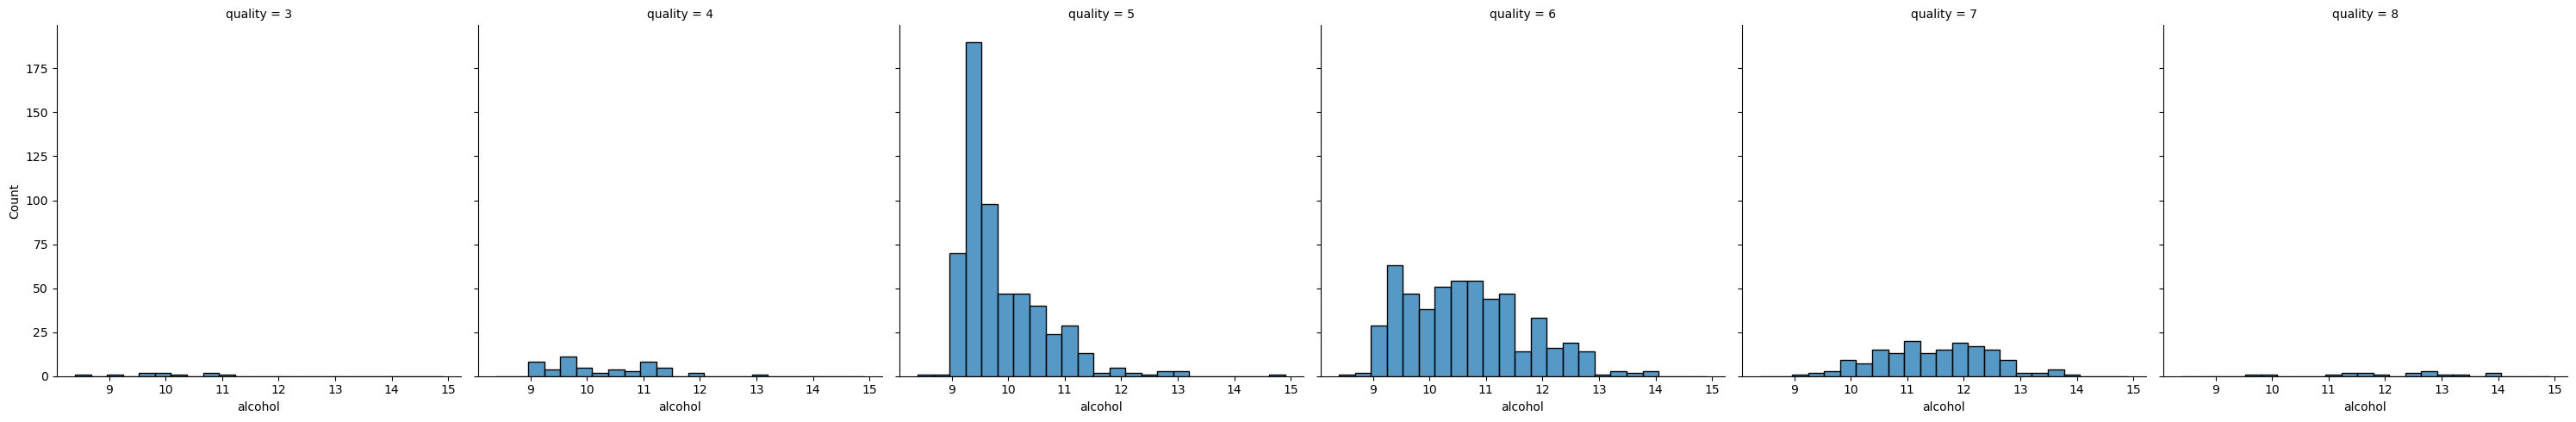

In [10]:
# Distribuição de "alcohol" por "quality"
ax = sns.boxplot(data=df_clean, x='quality', y='alcohol')
ax.grid(True, ls='--')

ax2 = sns.displot(data=df_clean, x='alcohol', col='quality')

In [11]:
# Estatísticas das variáveis
# df_clean.groupby('quality').agg(
#     {
#         'volatile acidity':['count','mean','sum','var','min','max'], 
#         'alcohol':['count','mean','sum','var','min','max']
#     }
# )

df_clean[['quality','volatile acidity','alcohol']].groupby('quality').describe(include='all')

volatile acidity                                                 \
                   count      mean       std   min     25%    50%   75%   
quality                                                                   
3                   10.0  0.884500  0.331256  0.44  0.6475  0.845  1.01   
4                   53.0  0.693962  0.220110  0.23  0.5300  0.670  0.87   
5                  577.0  0.578596  0.170017  0.18  0.4500  0.580  0.67   
6                  535.0  0.496084  0.162925  0.16  0.3800  0.490  0.60   
7                  167.0  0.403653  0.141162  0.12  0.3000  0.370  0.48   
8                   17.0  0.427647  0.148178  0.26  0.3300  0.380  0.49   

               alcohol                                                          
           max   count       mean       std  min     25%     50%     75%   max  
quality                                                                         
3        1.580    10.0   9.955000  0.818009  8.4   9.725   9.925  10.575  11.0  
4        1.130    53.0  10.265094  0.934776  9.0   9.600  10.000  11.000  13.1  
5        1.330   577.0   9.888562  0.749930  8.5   9.400   9.600  10.200  14.9  
6        1.040   535.0  10.658879  1.054933  8.4   9.800  10.500  11.400  14.0  
7        0.915   167.0  11.491118  0.970779  9.2  10.800  11.600  12.200  14.0  
8        0.850    17.0  12.158824  1.229867  9.8  11.400  12.500  12.900  14.0

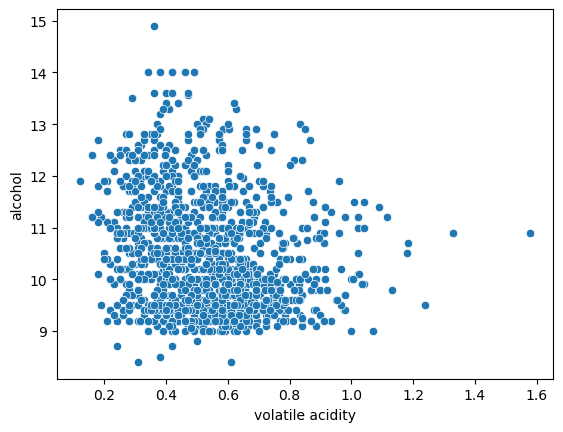

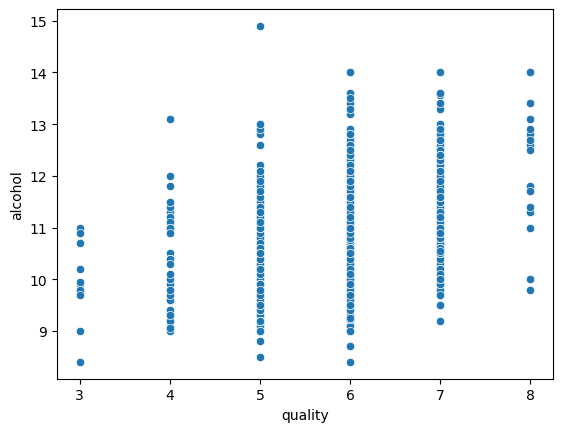

In [13]:
# Relação entre as variáveis
ax = sns.scatterplot(data=df_clean, x='volatile acidity', y='alcohol')
plt.show()

ax2 = sns.scatterplot(data=df_clean, x='quality', y='alcohol')


In [14]:
# Correlação entre variáveis
# df_clean[['quality','alcohol','volatile acidity']].corrwith(other=df_clean[['quality','alcohol','volatile acidity']])

print(f"correlação entre 'volatile acidity' e 'alcohol': {df_clean['volatile acidity'].corr(df_clean['alcohol'], method='pearson')}")
print(f"correlação entre 'quality' e 'alcohol': {df_clean['quality'].corr(df_clean['alcohol'], method='pearson')}")
# df_clean['quality'].corr(df_clean['alcohol'], method='pearson')

correlação entre 'volatile acidity' e 'alcohol': -0.1978122173725866
correlação entre 'quality' e 'alcohol': 0.4803428980019909


In [15]:
# Qual a acidez volátil média dos vinhos de qualidade elevada ?
print(df_clean.groupby('quality').agg({'volatile acidity':['mean','count']}))

# Considerando que qualidade elevada é quality >= 7
print(f"Média ponderada das médias de quality >= 7: {((0.403653*167)+(0.427647*17))/(167+17)}")

        volatile acidity      
                    mean count
quality                       
3               0.884500    10
4               0.693962    53
5               0.578596   577
6               0.496084   535
7               0.403653   167
8               0.427647    17
Média ponderada das médias de quality >= 7: 0.40586983695652173


In [16]:
# Qual a relação entre o teor alcóolico e qualidade do vinho ?
# Observamos um comportamento de correlação moderada positiva, ou seja, quando qualidade aumento o teor alcóolico tende a aumentar moderadamente também.
print(f"correlação entre 'quality' e 'alcohol': {df_clean['quality'].corr(df_clean['alcohol'], method='pearson')}")


correlação entre 'quality' e 'alcohol': 0.4803428980019909


correlação entre 'volatile acidity' e 'alcohol': -0.1978122173725866


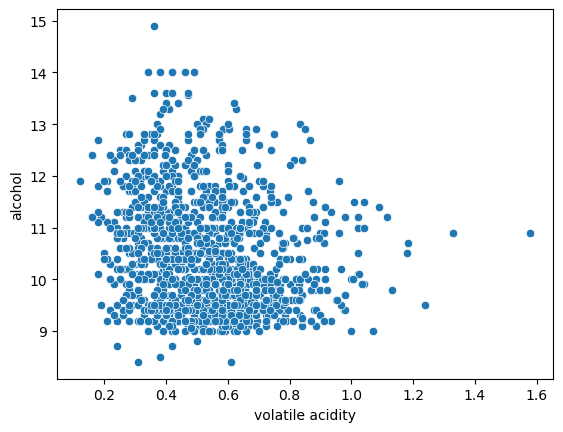

In [17]:
# Há alguma relação entre acidez volátil e teor alcóolco ?

# Existe uma correlação fraca negativa entre as duas variáveis, mas analisando o scatter plot não conseguimos 
# visualizar claramente um relacionamento, por isso eu diria que essas variáveis não tem relação. 
print(f"correlação entre 'volatile acidity' e 'alcohol': {df_clean['volatile acidity'].corr(df_clean['alcohol'], method='pearson')}")

sns.scatterplot(data=df_clean, x='volatile acidity', y='alcohol')
# df_clean.plot(kind='scatter', x='volatile acidity', y='alcohol', figsize=(10,5))
plt.show()

correlação entre 'volatile acidity' e 'quality': -0.39521368900984


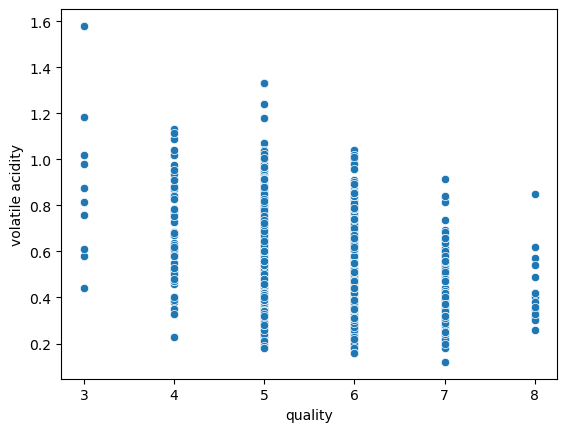

In [19]:
# Há alguma relação entre acidez volátil e qualidade do vinho ?

# Existe uma correlação negativa de fraca para moderada entre as duas variáveis e analisando o scatter plot conseguimos 
# visualizar um leve comportamento de queda na acidez volátil enquanto a qualidade aumenta, 
# por isso eu diria que essas variáveis tem relação. 
print(f"correlação entre 'volatile acidity' e 'quality': {df_clean['volatile acidity'].corr(df_clean['quality'], method='pearson')}")

sns.scatterplot(data=df_clean, y='volatile acidity', x='quality')
# df_clean.plot(kind='scatter', y='volatile acidity', x='quality', figsize=(10,5))
plt.show()